In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
#Read in the Shark  Attacks excel file
shark_attack = Path("global-shark-attack.xlsx")
shark_data = pd.read_excel(shark_attack)
shark_data.head()

,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number,Case Number.1,original order
0,NaN,1,Unprovoked,AUSTRALIA,New South Wales,Bondi,NaN,male,M,NaN,...,N,NaN,NaN,Waverly Library,5BC-AustralianAboriginal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5BC-Australia,5BC,131.0
1,NaN,1000,Unprovoked,USA,Puerto Rico,Archeological site,NaN,male,M,29,...,N,NaN,Tiger shark,P. Seigel,1000AD-PuertoRico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1000.00.00,1000.00.00,133.0
2,NaN,1500,Unprovoked,MEXICO,NaN,NaN,NaN,male,M,NaN,...,N,NaN,NaN,J. Castro,1200AD-Mexico.pdf,1200AD-Mexico.pdf,1200AD-Mexico.pdf,1200.00.00,1200.00.00,134.0
3,NaN,1518,Unprovoked,MEXICO,Yucatan,Cozumel,Swmming,A cacique (a chief),M,NaN,...,N,NaN,NaN,"C. Moore, GSAF",1518.04.00.R.chief.pdf,1518.04.00.R-chief.pdf,1518.04.00.R-chief.pdf,1518.04.00.R,1518.04.00.R,135.0
4,NaN,1543,Unprovoked,VENEZUELA,Magarita or Cubagua Islands,NaN,Pearl diving,Indian slave,M,NaN,...,Y,NaN,NaN,J. Castro,1543.00.00.R-LasCasas.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1543.00.00,1543.00.00,136.0


In [3]:
#Data Clean: Drop all columns except Time and Date, drop missing values
clean_shark = pd.DataFrame(shark_data[['Time', 'Date']])
clean_shark= clean_shark.dropna()
clean_shark

,Time,Date
17,Night,1703-03-26
34,06h00,1783-03-02
35,22h00,1784-12-12
58,13h00,1817-02-22
59,Evening,1817-05-11
...,...,...
6182,15h30,2023-07-30
6183,09h30,2023-07-31
6184,17h50,2023-08-07
6185,19h30,2023-08-16


In [4]:
#Converting rows in 00h00 format to 00 format
clean_shark['Time'] = clean_shark["Time"].str.replace(r'(\d{2})[hj]+\d{2,3}' , r'\1', regex=True)
clean_shark

,Time,Date
17,Night,1703-03-26
34,06,1783-03-02
35,22,1784-12-12
58,13,1817-02-22
59,Evening,1817-05-11
...,...,...
6182,15,2023-07-30
6183,09,2023-07-31
6184,17,2023-08-07
6185,19,2023-08-16


In [5]:
#Regex code to delete "--", "/\", and spaces. Shows unique values left
clean_shark['Time'] = clean_shark["Time"].str.replace(r'(\d{2})\s*/\s*\d{2}' , r'\1', regex=True)
clean_shark['Time'] = clean_shark["Time"].str.replace(r'(\d{2})\s*-+\s*d{2}' , r'\1', regex=True)
clean_shark['Time'].unique()

array(['Night', '06', '22', '13', 'Evening', '19-20', 'Morning', '17-18',
       '14', 'Afternoon', '01', '15', '10', '18', '06 -- 07', '20', '16',
       '09', 'Before 10', '12', '11', 'A.M.', '05', '02', '07', '03',
       'Before daybreak', 'Early morning', 'Late Afternoon', '08',
       'Early evening', '17', 'P.M.', 'Midday', '19', 'Late afternon',
       'After midnight',
       'FATAL  (Wire netting installed at local beaches after this incident.)',
       'After dusk', 'Late afternoon', 'Ship aban-doned at 03',
       '11 -time of ship sinking', 'After 04', '>14', '>17', 'Dusk',
       'shortly before dusk', 'Dark', '18 to 21', '2 hrs before sunset',
       '10 or 14', 'After dark', '21', 'Midday.', 'Early afternoon',
       '15j', 'Midnight', '10 or 13', 'Late night', '03 - 04', 'night',
       '14 - 15', 'Dawn', '15 or 15', '23', '04', 'Daytime', '1600',
       'Just before dawn', '16 or 18', 'Mid-morning', '>12', 'Daybreak',
       'Prior to 10', '18 (Sunset)', 'X', 'Nightfa

In [6]:
#Replacing words with numbers and showing unique values
clean_replaced= clean_shark.replace(to_replace={'Night':'22', 'Evening':'19', 'Afternoon':'14', 
                                                     'After noon':'14','Noon':'12', 'Morning':'07', 'Midday':'12',
                                                     'Early afternoon': '13', 'Late afternon':'15',
                                                    'Midnight': '24', 'Shortly after midnight':'1',
                                                    'Early morning':'06', 'Late Afternoon':'16', 'After midnight':'02',
                                                     'Late night':'22','Mid morning':'09', 'Mid afternoon':'15',
                                                    'Late morning':'11','Just before noon':'11', 'Lunchtime':'12',
                                                    'Early evening':'17','Mid-morning':'09', 
                                                'Before daybreak':'05', 'P.M.':'15','A.M.':'05',
                                               'After dusk':'20','Dusk':'18','Ship aban-doned at 03':'03',
                                                '11 -time of ship sinking':'11','After 04':'04','After dark':'20',
                                               'Nightfall':'19','Dark':'22', 'After Dusk':'20',
                                                'Early Morning':'06','Late afternoon':'16', 
                                                'shortly before dusk':'16', '2 hrs before sunset':'16',
                                                'Midday':'12','night':'20','Dawn':'07','Just before dawn':'06',
                                               'Daytime':'15', 'Daybreak':'07','Prior to 10':'09',
                                                'Sunset':'18','18?':'18','Just before sundown':'17', 
                                               'AM':'03','Shortly before 12':'11', 'Early  morning': '06',
                                               'Midday.':'12', 'Between 06 & 07':'06', '8:04 pm':'08',
                                               'Shortly before 13':'12', 'Sometime between 06 & 08hoo':'07',
                                               'Before 10':'09', 'Just before 11':'10', '13.0':'13',
                                                '19, Dusk':'19','Just after 12':'11','11hoo':'11',
                                                '17 Sunset':'17','18 (Sunset)':'18','20 (Sunset)':'20',
                                               '22':'22','Before 07':'06', '13.0':'13','9h00':'09','`17':'17',
                                                ' 07':'07'}, inplace=False)
clean_replaced['Time'].unique()

array(['22', '06', '13', '19', '19-20', '07', '17-18', '14', '01', '15',
       '10', '18', '06 -- 07', '20', '16', '09', '12', '11', '05', '02',
       '03', '08', '17',
       'FATAL  (Wire netting installed at local beaches after this incident.)',
       '04', '>14', '>17', '18 to 21', '10 or 14', '21', '15j', '24',
       '10 or 13', '03 - 04', '14 - 15', '15 or 15', '23', '1600',
       '16 or 18', '>12', 'X', '<07', '>06',
       '30 minutes after 1992.07.08.a', '2 hours after Opperman',
       '09 -10', '1', '--', '>08', '17 or 17', 'N', '10 -- 11', '0500',
       '0830', '09 - 09', '18-18', '07 - 08', '10-11', '1300.0',
       '14  -15', '14-15', '09-10', '-16'], dtype=object)

In [7]:
#Regex codes to delete various extra elements and clean data more
clean_replaced['Time'] = clean_replaced["Time"].str.replace(r'(\d{2})[-\s]+\d{2}' , r'\1', regex=True)
clean_replaced['Time'] = clean_replaced["Time"].str.replace(r'[><](\d{2})', r'\1', regex=True)
clean_replaced['Time'] = clean_replaced["Time"].str.replace(r'(\d{2})j$' , r'\1', regex=True)
clean_replaced['Time'] = clean_replaced["Time"].str.replace(r'(\d{2})\s*or\s*\d{2}' , r'\1', regex=True)
clean_replaced['Time'] = clean_replaced["Time"].str.replace(r'(\d{2})\s*to\s*\d{2}' , r'\1', regex=True)
clean_replaced['Time'] = clean_replaced["Time"].str.replace(r'(\d{2})\d{2}' , r'\1', regex=True)
clean_replaced['Time'].unique()

array(['22', '06', '13', '19', '07', '17', '14', '01', '15', '10', '18',
       '20', '16', '09', '12', '11', '05', '02', '03', '08',
       'FATAL  (Wire netting installed at local beaches after this incident.)',
       '04', '21', '24', '23', 'X', '30 minutes after 19.07.08.a',
       '2 hours after Opperman', '1', '--', 'N', '13.0', '-16'],
      dtype=object)

In [8]:
#Cleaning data more by keeping only numerical values
times_df = clean_replaced.loc[clean_replaced['Time'].str.isnumeric(),:]
times_df=times_df.astype({"Time":'int64'}, errors='raise')
times_df

,Time,Date
17,22,1703-03-26
34,6,1783-03-02
35,22,1784-12-12
58,13,1817-02-22
59,19,1817-05-11
...,...,...
6182,15,2023-07-30
6183,9,2023-07-31
6184,17,2023-08-07
6185,19,2023-08-16


In [9]:
#Using bins to group times into three categories (Morning, Midday, Night)
bins=[0, 11, 17, 24]
labels= ["Morning", "Midday", "Night"]
times_df['Group']= pd.cut(times_df['Time'], bins, labels=labels, include_lowest=True)
times_df

,Time,Date,Group
17,22,1703-03-26,Night
34,6,1783-03-02,Morning
35,22,1784-12-12,Night
58,13,1817-02-22,Midday
59,19,1817-05-11,Night
...,...,...,...
6182,15,2023-07-30,Midday
6183,9,2023-07-31,Morning
6184,17,2023-08-07,Midday
6185,19,2023-08-16,Night


In [10]:
#Replacing grammatical error in one of the dates and organizing dates based on just months
times_df= times_df.replace(to_replace={'202-07-10':'2020-07-10'})
times_df['Month']= times_df['Date'].str.replace(r'\d{4}-(\d{2})-\d{2}' , r'\1', regex=True)
times_df

,Time,Date,Group,Month
17,22,1703-03-26,Night,03
34,6,1783-03-02,Morning,03
35,22,1784-12-12,Night,12
58,13,1817-02-22,Midday,02
59,19,1817-05-11,Night,05
...,...,...,...,...
6182,15,2023-07-30,Midday,07
6183,9,2023-07-31,Morning,07
6184,17,2023-08-07,Midday,08
6185,19,2023-08-16,Night,08


In [11]:
#Determining how many attacks each group has
group_counts = times_df.value_counts(['Group']).reset_index()
group_counts

,Group,count
0,Midday,1711
1,Morning,1090
2,Night,361


In [12]:
#Determining how many attacks each month has
month_counts = times_df.value_counts(['Month']).reset_index()
month_counts

,Month,count
0,07,365
1,08,322
2,09,317
3,06,279
4,01,270
5,10,264
6,04,257
7,12,233
8,03,225
9,05,225


In [13]:
#Putting months in order and replacing numerical values with the name of the month
month_counts = month_counts.sort_values(by="Month")
month_counts["Month"] = month_counts["Month"].replace({'01':'January','02':'February','03':'March','04':'April','05':'May',
                                                      '06':'June','07':'July','08':'August','09':'September','10':'October',
                                                      '11':'November','12':'December'})
month_counts

,Month,count
4,January,270
11,February,199
8,March,225
6,April,257
9,May,225
3,June,279
0,July,365
1,August,322
2,September,317
5,October,264


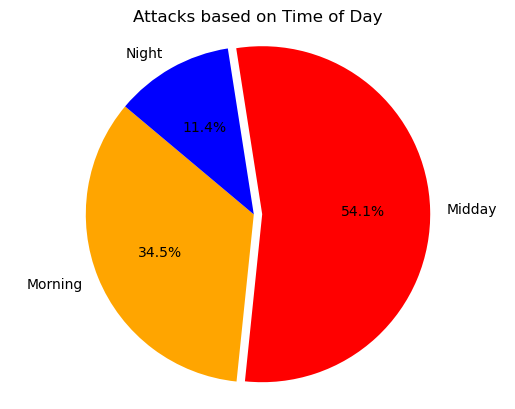

In [14]:
#Create pie chart for groups (Morning, Midday, Night)
group_counts
categories = ['Morning','Midday','Night']
values = [1090, 1711, 361]
colors = ['orange', 'red', 'blue']
explode = (0, 0.05,0)
plt.pie(values, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.axis('equal')
plt.title('Attacks based on Time of Day')
plt.show()

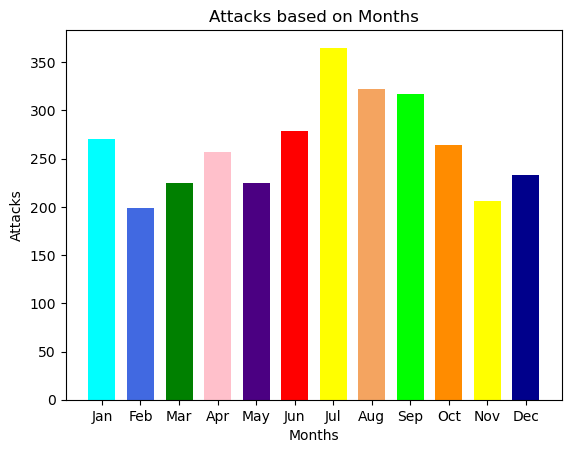

In [15]:
#Create bar graph for months
month_counts
categories = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
values = [270,199,225,257,225,279,365,322,317,264,206,233]
colors = ['cyan','royalblue','green','pink','indigo','red','yellow','sandybrown','lime','darkorange','yellow','darkblue']
plt.bar(categories,values, color=colors, width=0.7)
plt.xlabel("Months")
plt.ylabel("Attacks")
plt.title("Attacks based on Months")
plt.show()